Projet pandas : analyse du taux de réussite au baccalauréat en fonction de la classe sociale

In [129]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv('fr-en-reussite-au-baccalaureat-origine-sociale.csv', sep = ";")
# Il y a des virgules dans le csv, on définit le séparateur ";"

à faire :

Résultats en fonction des années, à chaque bac (bac plus facile avec le temps?).

Résultats en fonction de la filière choisie.

Résultats en fonction de l'origine sociale pour chaque filière.

Nombre de candidats dans les filières en fonction des origines sociales (+ de bac techno pour les ouvriers par ex).

Faire des graphiques pour chaque origine sociale en fonction des années.

Nombre de candidats issue d'une origine sociale = indicateur du nb de gens dans cette catégorie sociale?

Idées bonus : 
Ajouter le revenu moyen de chaque milieu pour tracer les résultats en fonction des revenus

Mise en forme du dataframe avant de l'exploiter:

In [131]:
# On ajoute les colonnes pour avoir le nombre total de candidats qui s'inscrivent au baccalauréat
df["nombre_candidats_au_baccalaureat_general"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_general"])*df['nombre_d_admis_au_baccalaureat_general'])
df["nombre_candidats_au_baccalaureat_technologique"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_technologique"])*df['nombre_d_admis_au_baccalaureat_technologique'])
df["nombre_candidats_au_baccalaureat_professionnel"] = np.floor((100/df["pourcentage_d_admis_au_baccalaureat_professionnel"])*df['nombre_d_admis_au_baccalaureat_professionnel'])


#print(df.isna().sum()) # pas de valeurs manquantes
print(df["origine_sociale"].unique())
# On renomme les catégorie sociales pour faciliter la lecture
df.loc[df['origine_sociale'] == 'Cadres, professions intellectuelles supérieures : professeurs et assimilés', ['origine_sociale']] = "professeurs et assimilés"
df.loc[df['origine_sociale'] == 'Professions intermédiaires : instituteurs et assimilés', ['origine_sociale']] = "instituteurs et assimilés"

print(df["origine_sociale"].unique())

by_origine = df.groupby(["origine_sociale"])
by_annee = df.groupby(["annee"])
by_origine_annee = df.groupby(["origine_sociale", "annee"])

"""
print(by_origine_annee['pourcentage_d_admis_au_baccalaureat'].mean()) # par catégorie+année tout bac
print(by_origine_annee['pourcentage_d_admis_au_baccalaureat_technologique'].mean()) # par catégorie+année bac techno
print(by_origine_annee['pourcentage_d_admis_au_baccalaureat_general'].mean()) # par catégorie+année bac general
print(by_origine_annee['pourcentage_d_admis_au_baccalaureat_professionnel'].mean()) # par catégorie+année bac pro
"""

['Autres personnes sans activité professionnelle'
 'Cadres, professions intellectuelles supérieures : professeurs et assimilés'
 'Indéterminé' 'Retraités' "Artisans, commerçants, chefs d'entreprise"
 'Employés' 'Ouvriers' 'Professions intermédiaires' 'Ensemble'
 'Cadres, professions intellectuelles supérieures'
 'Professions intermédiaires : instituteurs et assimilés'
 'Agriculteurs exploitants']
['Autres personnes sans activité professionnelle'
 'professeurs et assimilés' 'Indéterminé' 'Retraités'
 "Artisans, commerçants, chefs d'entreprise" 'Employés' 'Ouvriers'
 'Professions intermédiaires' 'Ensemble'
 'Cadres, professions intellectuelles supérieures'
 'instituteurs et assimilés' 'Agriculteurs exploitants']


"\nprint(by_origine_annee['pourcentage_d_admis_au_baccalaureat'].mean()) # par catégorie+année tout bac\nprint(by_origine_annee['pourcentage_d_admis_au_baccalaureat_technologique'].mean()) # par catégorie+année bac techno\nprint(by_origine_annee['pourcentage_d_admis_au_baccalaureat_general'].mean()) # par catégorie+année bac general\nprint(by_origine_annee['pourcentage_d_admis_au_baccalaureat_professionnel'].mean()) # par catégorie+année bac pro\n"

Pourcentage d'admis au baccalauréat par année

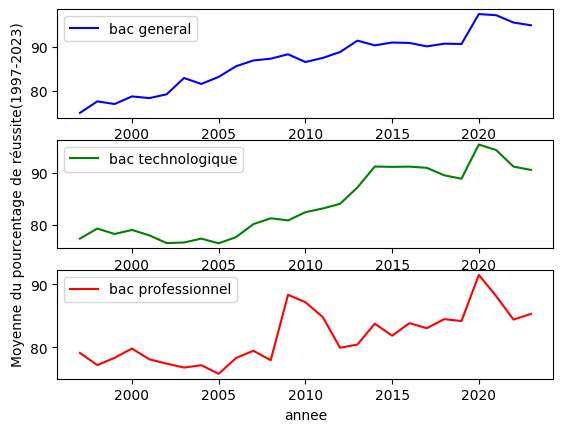

In [134]:
fig_gen = plt.subplot(311)
by_annee['pourcentage_d_admis_au_baccalaureat_general'].mean().plot(color = "b",label = "bac general")
plt.legend()


fig_tech = plt.subplot(312)
by_annee['pourcentage_d_admis_au_baccalaureat_technologique'].mean().plot(color = "g",label = "bac technologique")
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.legend()

fig_pro = plt.subplot(313)
by_annee['pourcentage_d_admis_au_baccalaureat_professionnel'].mean().plot(color = "r", label = "bac professionnel")
plt.legend()

plt.show()


Pourcentage de réussite au baccalauréat en fonction de l'origine sociale: 

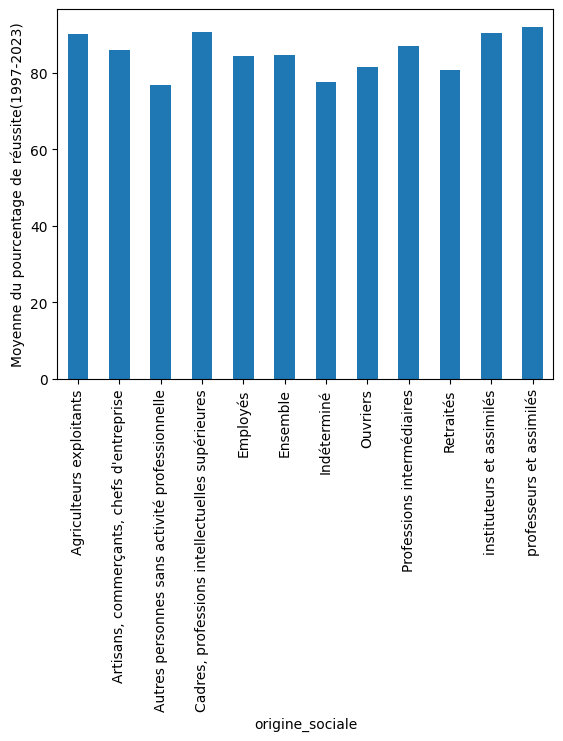

In [ ]:
by_origine['pourcentage_d_admis_au_baccalaureat'].mean().plot.bar()
plt.ylabel("Moyenne du pourcentage de réussite(1997-2023)")
plt.show()

Nombre de réussites au baccalauréat en fonction de l'origine sociale

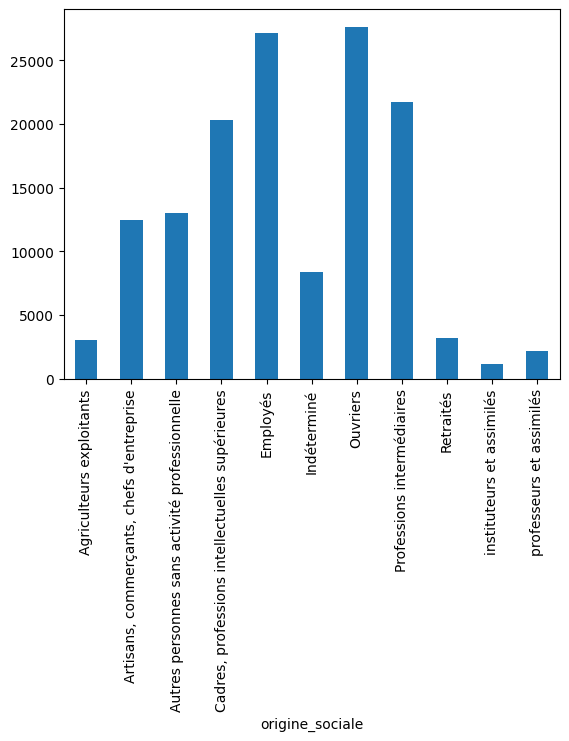

In [ ]:
by_origine['nombre_d_admis_au_baccalaureat_technologique'].mean().drop(labels = "Ensemble", axis = 0).plot.bar() # drop pour supprimer la ligne "Ensemble" qui est la somme de toutes les autres
plt.show()